In [2]:
import cv2
from glob import glob
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
# num_of_slices = []
# shapes_x = []
# shapes_y = []
# paths = list(glob("/home/sdejong/skinstression/data/stacks/*.tif"))

# for img in paths:
#     image = np.array(cv2.imreadmulti(img)[1])
#     num_of_slices.append(image.shape[0])
#     shapes_x.append(image.shape[1])
#     shapes_y.append(image.shape[2])

# print(np.max(num_of_slices))
# print(f"this is for {paths[np.argmax(num_of_slices)]}")

# print(np.min(shapes_x))
# print(f"this is for {paths[np.argmin(shapes_x)]}")

In [4]:
# plt.subplot(131)
# plt.hist(shapes_x)
# plt.subplot(132)
# plt.hist(shapes_y)
# plt.subplot(133)
# plt.hist(num_of_slices)
# print(np.unique(num_of_slices, return_counts=True))

So we need to pad every image to 61 slices
Or crop everything to the same number of slices. We choose 31 because there are they are the most.

In [5]:
output_size = (31, 1000, 1000)
output = torch.zeros(output_size)
image = torch.tensor(np.array(cv2.imreadmulti("/home/sdejong/skinstression/data/stacks/16.tif")[1]))
from time import time
start = time()
slices = np.array([slice(0, min(output_size[i], image.shape[i])) for i in range(len(output_size))])
print(f"finished in {time() - start}")
output[slices] = image[slices]
print(output.shape)

finished in 0.0003905296325683594
torch.Size([31, 1000, 1000])


In [6]:
print(output.shape)
print(image.shape)

torch.Size([31, 1000, 1000])
torch.Size([31, 500, 500])


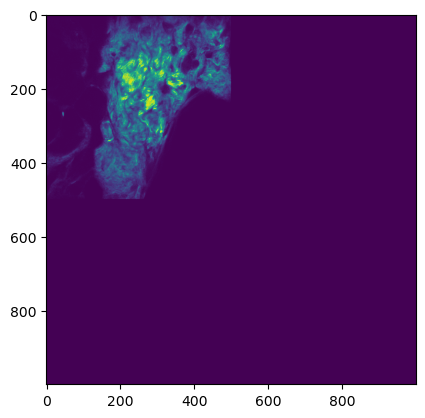

In [7]:
plt.imshow(output[15, :, :])

In [8]:
from monai.networks.nets import HighResNet

model = HighResNet(spatial_dims=3, in_channels=1, out_channels=1)
model(output.unsqueeze(0).unsqueeze(0))

: 

: 